In [88]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

## Total Remote Work

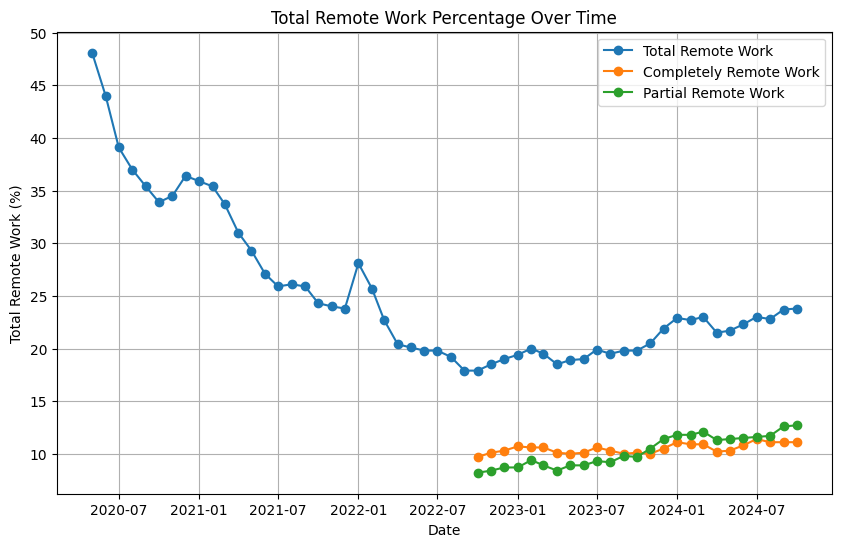

In [89]:
# Load the dataset
file_path = 'remote_work.xlsx'
df = pd.read_excel(file_path)

# Extract and clean the relevant columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime
time_series_data = df[['Date', 'Total_Adjusted']].dropna()
time_series_data.set_index('Date', inplace=True)

# Plot the data to visualize
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Total Remote Work", marker='o')
plt.plot(df['Date'], df['Fully_Remote'], label="Completely Remote Work", marker='o')
plt.plot(df['Date'], df['Some_Remote'], label="Partial Remote Work", marker='o')
plt.title("Total Remote Work Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("Total Remote Work (%)")
plt.legend()
plt.grid()
plt.show()

In [90]:
adf_test = adfuller(time_series_data['Total_Adjusted'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Stationary" if adf_test[1] < 0.05 else "Non-Stationary")

ADF Statistic: -4.966015793780458
p-value: 2.589947333137841e-05
Stationary


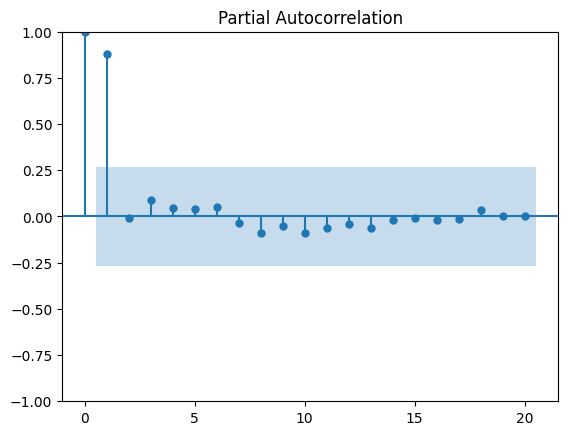

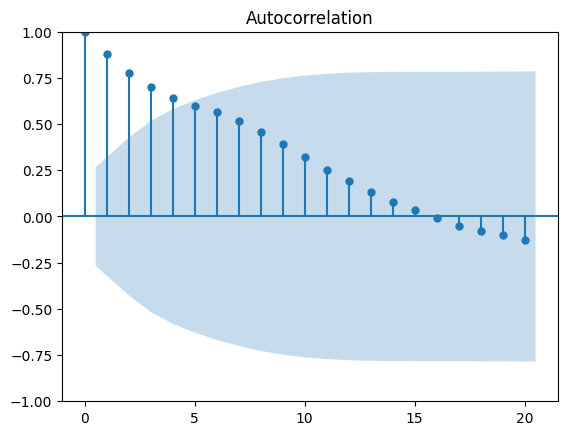

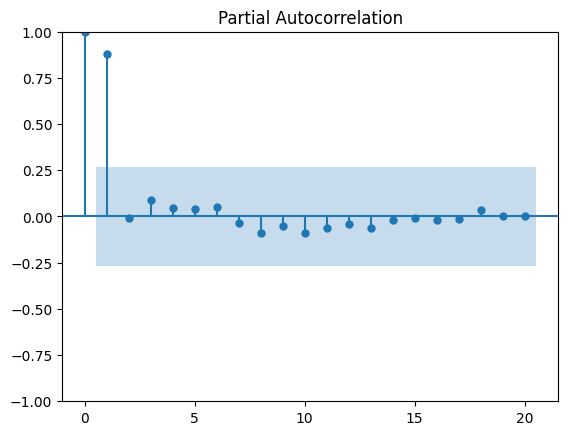

In [91]:
plot_acf(time_series_data['Total_Adjusted'], lags=20)
plot_pacf(time_series_data['Total_Adjusted'], lags=20)

In [92]:
# Fit the ARIMA model
model = ARIMA(time_series_data['Total_Adjusted'], order=(2, 0, 16))
model_fit = model.fit()

# Summarize the results
print(model_fit.summary())

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         Total_Adjusted   No. Observations:                   54
Model:                ARIMA(2, 0, 16)   Log Likelihood                 -87.553
Date:                Mon, 09 Dec 2024   AIC                            215.105
Time:                        01:13:18   BIC                            254.885
Sample:                    05-01-2020   HQIC                           230.446
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7732     22.623      1.139      0.255     -18.567      70.114
ar.L1          0.5153      4.806      0.107      0.915      -8.905       9.936
ar.L2          0.4387      4.571      0.096      0.9

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


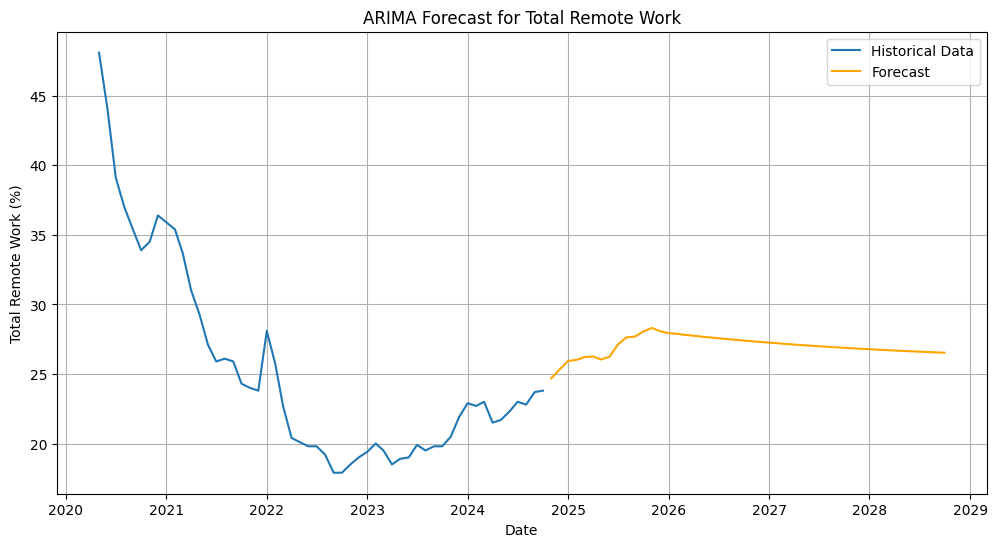

In [ ]:
# Forecast the next 4 years
forecast = model_fit.get_forecast(steps=48)
forecast_index = pd.date_range(
    start=time_series_data.index[-1], periods=48, freq='ME'
)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Total_Adjusted'], label="Historical Data")
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
plt.title("ARIMA Forecast for Total Remote Work")
plt.xlabel("Date")
plt.ylabel("Total Remote Work (%)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Mean Squared Error calculation
predicted = model_fit.predict(start=0, end=len(time_series_data) - 1)
mse = mean_squared_error(time_series_data['Total_Adjusted'], predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.731470658750792


## Full Time Remote Work Only

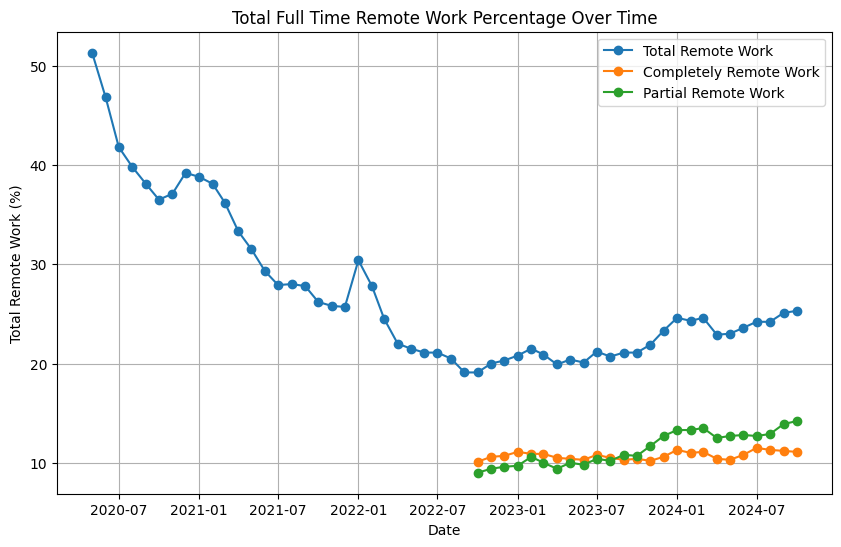

In [ ]:
# Extract and clean the relevant columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime
time_series_data = df[['Date', 'FT_Total_Adjusted']].dropna()
time_series_data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Total Remote Work", marker='o')
plt.plot(df['Date'], df['FT_Fully_Remote'], label="Completely Remote Work", marker='o')
plt.plot(df['Date'], df['FT_Some_Remote'], label="Partial Remote Work", marker='o')
plt.title("Total Full Time Remote Work Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("Total Remote Work (%)")
plt.legend()
plt.grid()
plt.show()

In [96]:
adf_test = adfuller(time_series_data['FT_Total_Adjusted'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Stationary" if adf_test[1] < 0.05 else "Non-Stationary")

ADF Statistic: -4.814447971293761
p-value: 5.10284922665505e-05
Stationary


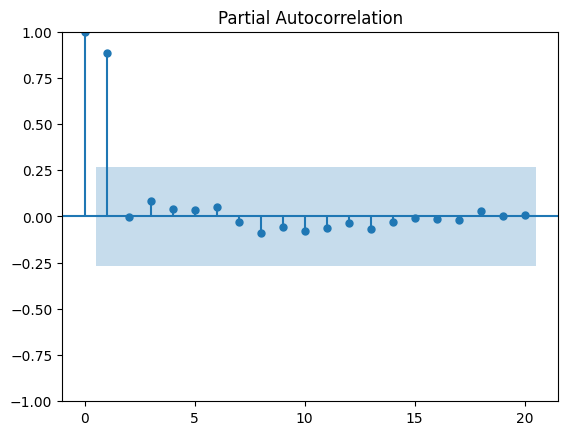

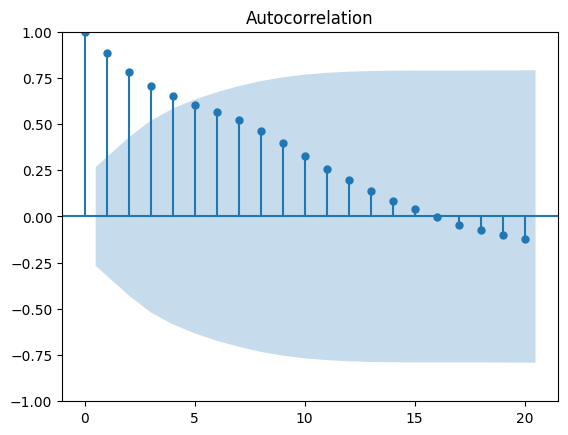

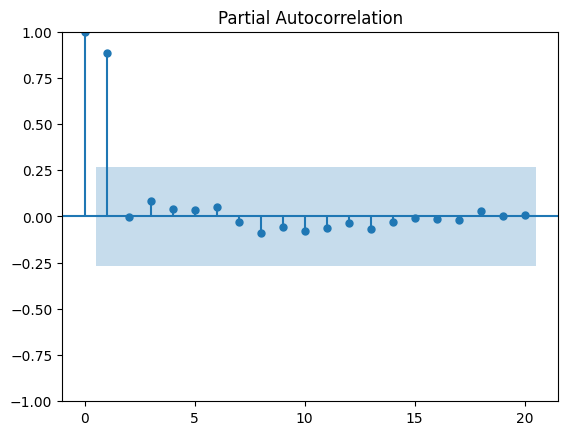

In [97]:
plot_acf(time_series_data['FT_Total_Adjusted'], lags=20)
plot_pacf(time_series_data['FT_Total_Adjusted'], lags=20)

In [98]:
# Fit the ARIMA model
model = ARIMA(time_series_data['FT_Total_Adjusted'], order=(2, 0, 16))
model_fit = model.fit()

# Summarize the results
print(model_fit.summary())

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      FT_Total_Adjusted   No. Observations:                   54
Model:                ARIMA(2, 0, 16)   Log Likelihood                 -92.034
Date:                Mon, 09 Dec 2024   AIC                            224.068
Time:                        01:13:19   BIC                            263.848
Sample:                    05-01-2020   HQIC                           239.410
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4510     24.586      1.117      0.264     -20.737      75.639
ar.L1          0.6771      4.450      0.152      0.879      -8.045       9.400
ar.L2          0.2792      4.198      0.067      0.9

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


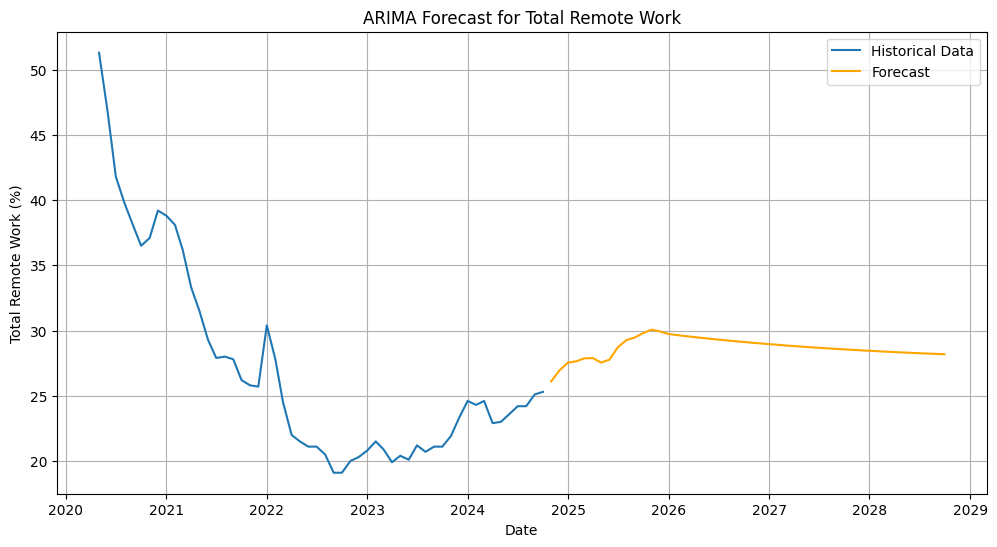

In [ ]:
# Forecast the next 4 years
forecast = model_fit.get_forecast(steps=48)
forecast_index = pd.date_range(
    start=time_series_data.index[-1], periods=48, freq='ME'
)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['FT_Total_Adjusted'], label="Historical Data")
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
plt.title("ARIMA Forecast for Total Remote Work")
plt.xlabel("Date")
plt.ylabel("Total Remote Work (%)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Mean Squared Error calculation
predicted = model_fit.predict(start=0, end=len(time_series_data) - 1)
mse = mean_squared_error(time_series_data['FT_Total_Adjusted'], predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12.285791275090302


## Part Time Remote Work Only

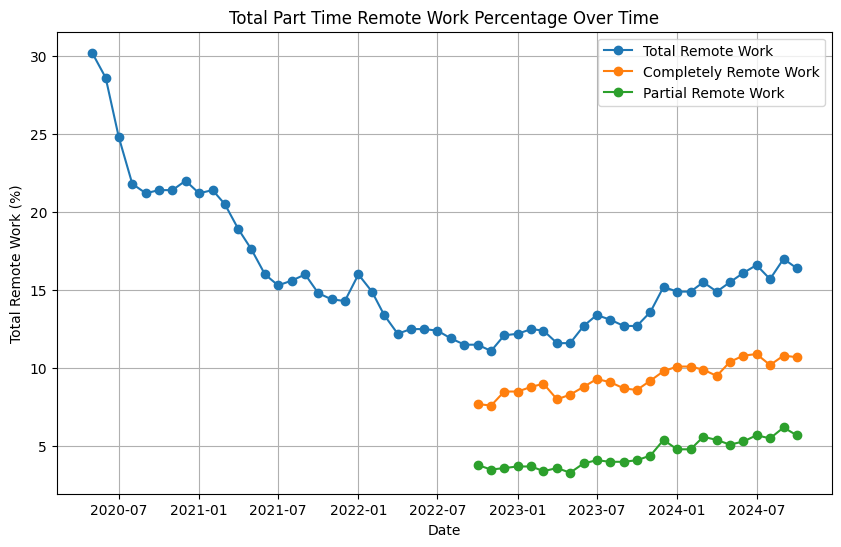

In [ ]:
# Extract and clean the relevant columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime
time_series_data = df[['Date', 'PT_Total_Adjusted']].dropna()
time_series_data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Total Remote Work", marker='o')
plt.plot(df['Date'], df['PT_Fully_Remote'], label="Completely Remote Work", marker='o')
plt.plot(df['Date'], df['PT_Some_Remote'], label="Partial Remote Work", marker='o')
plt.title("Total Part Time Remote Work Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("Total Remote Work (%)")
plt.legend()
plt.grid()
plt.show()

In [102]:
adf_test = adfuller(time_series_data['PT_Total_Adjusted'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Stationary" if adf_test[1] < 0.05 else "Non-Stationary")

ADF Statistic: -1.6174008915610736
p-value: 0.4740921713324568
Non-Stationary


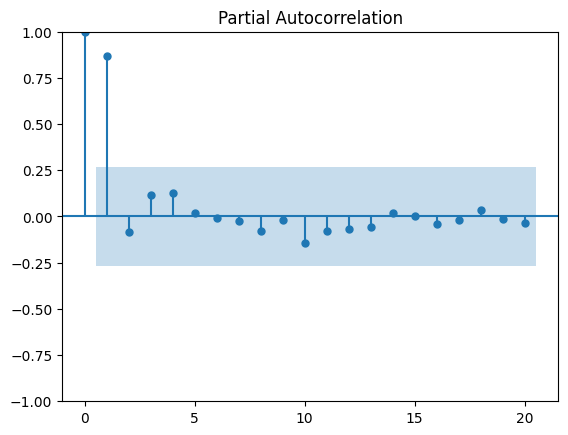

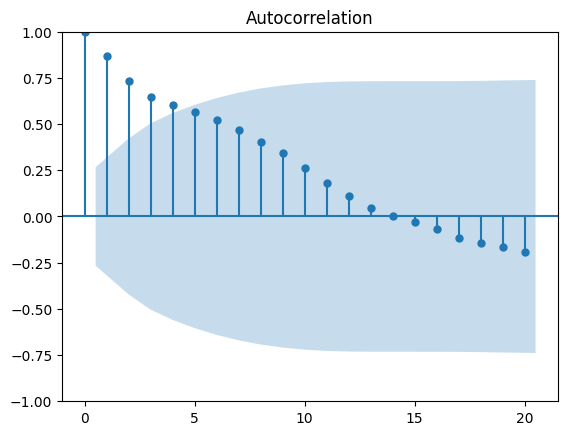

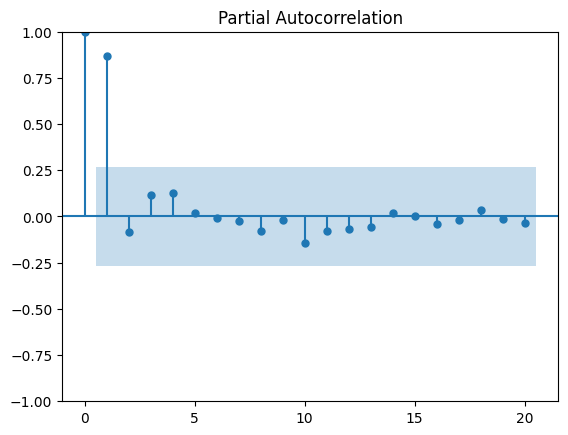

In [103]:
plot_acf(time_series_data['PT_Total_Adjusted'], lags=20)
plot_pacf(time_series_data['PT_Total_Adjusted'], lags=20)

In [104]:
# Fit the ARIMA model
model = ARIMA(time_series_data['PT_Total_Adjusted'], order=(2, 0, 14))
model_fit = model.fit()

# Summarize the results
print(model_fit.summary())

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      PT_Total_Adjusted   No. Observations:                   54
Model:                ARIMA(2, 0, 14)   Log Likelihood                 -63.794
Date:                Mon, 09 Dec 2024   AIC                            163.587
Time:                        01:13:21   BIC                            199.389
Sample:                    05-01-2020   HQIC                           177.394
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0989      9.797      1.745      0.081      -2.104      36.301
ar.L1          0.4791      0.919      0.521      0.602      -1.322       2.280
ar.L2          0.4799      0.854      0.562      0.5

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


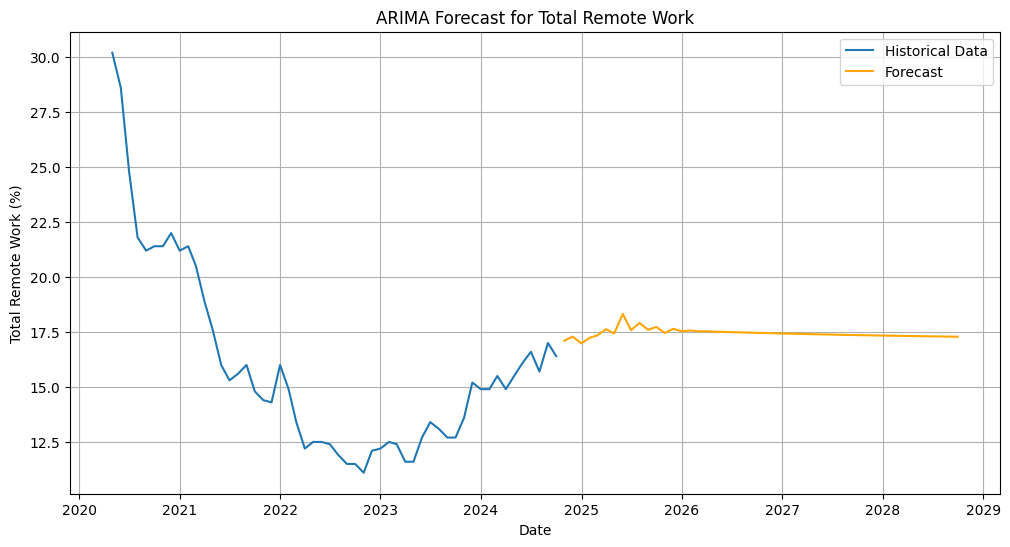

In [ ]:
# Forecast the next 4 years
forecast = model_fit.get_forecast(steps=48)
forecast_index = pd.date_range(
    start=time_series_data.index[-1], periods=48, freq='ME'
)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['PT_Total_Adjusted'], label="Historical Data")
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
plt.title("ARIMA Forecast for Total Remote Work")
plt.xlabel("Date")
plt.ylabel("Total Remote Work (%)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Mean Squared Error calculation
predicted = model_fit.predict(start=0, end=len(time_series_data) - 1)
mse = mean_squared_error(time_series_data['PT_Total_Adjusted'], predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.820399801556576
